# Polynomial Regression 

<br>

We can use a liinear model to fit non linear data. A simple way to do this is to add powers of each features as new features, then train a linear model on this extended set of features. This is called _Polynomial Regression._

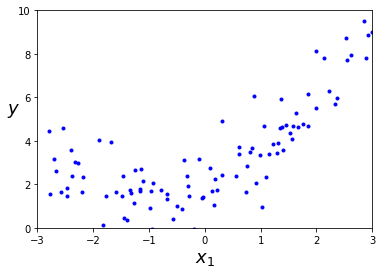

In [22]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
m = 100
X = 6 * np.random.rand(m,1) - 3 # Creates array of given shape and populate it with random samples with uniform distribution
y = 0.5 * X**2 + X+2+np.random.randn(m,1) # Quadratic Equation
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [16]:
# Straight line will never fit this data properly. 
# Scikit learn's PolynomialFeatures class to transform our training data, adding the square of each feature in the trainig set as new features


from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.76575034])

In [17]:
X_poly[0]

array([0.76575034, 0.58637358])

X_poly now has original features of X and square of this feature.

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_


(array([1.96134937]), array([[0.95094178, 0.49714044]]))

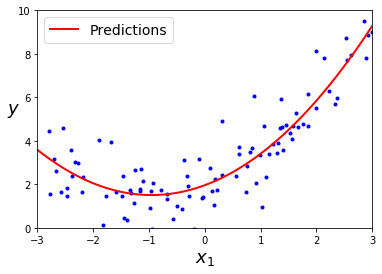

In [23]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
# numpy.linspace returns evenly spaced numbers over a specified interval. 
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## Learning Curves

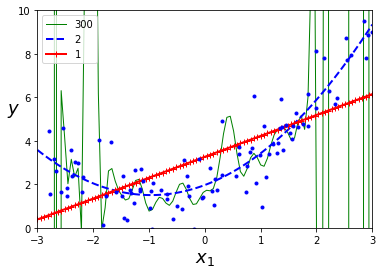

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()